In [4]:
# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get update -qq 2>&1 > /dev/null
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18396 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8.1) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .

Processing triggers for libc-bin (2.26-0ubuntu2.1) ...
Setting up libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Setting up unattended-upgrades (0.98ubuntu1.1) ...

Creating config file /etc/apt/apt.conf.d/20auto-upgrades with new version

Creating config file /etc/apt/apt.conf.d/50unattended-upgrades with new version
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up dirmngr (2.1.15-1ubuntu8.1) ...
Setting up cron (3.0pl1-128ubuntu5) ...
Adding group `crontab' (GID 102) ...
Done.
update-rc.d: warning: start and stop actions are no longer supported; falling back to defaults
update-rc.d: warning: stop runlevel arguments (1) do not match cron Default-Stop values (none)
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Setting up kmod (24-1ubuntu2) ...
Setting up libdbus-glib-1-2:amd64 (0.108-2) ...
Setting up python3-gi (3.24.1

In [0]:
# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()

In [6]:
# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
# Work around misordering of STREAM and STDIN in Jupyter.
# https://github.com/jupyter/notebook/issues/3159
prompt = !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass(prompt[0] + '\n\nEnter verification code: ')
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force

Enter verification code: ··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [7]:
# Create a directory and mount Google Drive using that directory.
!mkdir -p drive
!google-drive-ocamlfuse drive

print('Files in Drive:')
!ls drive/Datasets

Files in Drive:
dog.jpg


In [9]:
!ls drive/Datasets

CIFAR10.csv


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
from keras.datasets import cifar10




In [0]:
from keras.utils import np_utils
from keras.models import Sequential

In [0]:
from keras.layers.core import Dense,Dropout, Activation,Flatten

In [0]:
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [0]:
from keras.optimizers import SGD, Adam, RMSprop
# fix random seed for reproducibility
np.random.seed(7)

In [0]:
Img_channels=3

In [0]:
Img_rows=32
Img_cols=32

In [0]:
#constants
batch_size=128
epoch=35
classes=10
verbose=2
validation_split=0.2
optim=Adam()


In [0]:
#Load Dataset

(X_train, Y_train), (X_test, Y_test)=cifar10.load_data()

In [66]:
print(np.unique(Y_train))
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

[0 1 2 3 4 5 6 7 8 9]
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)


[]

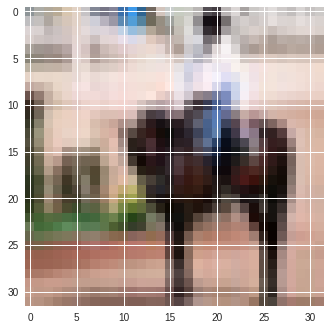

In [35]:
plt.imshow(X_train[11])
plt.plot()

In [0]:
#Categorical conversion

Y_train=np_utils.to_categorical(Y_train,classes)
Y_test=np_utils.to_categorical(Y_test,classes)

In [0]:
#Float and normalisation

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255

In [0]:
#creating network

model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(Img_rows,Img_cols,Img_channels)))
model.add(Activation('relu'))

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [0]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(classes))
model.add(Activation('softmax'))


In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
__________

In [0]:
#Training Part

model.compile(loss='categorical_crossentropy',optimizer=optim,metrics=['accuracy'])

In [43]:
history=model.fit(X_train, Y_train, batch_size=batch_size,epochs=epoch,validation_split=validation_split,verbose=verbose)

Train on 40000 samples, validate on 10000 samples
Epoch 1/35
 - 80s - loss: 1.7226 - acc: 0.3781 - val_loss: 1.3995 - val_acc: 0.5099
Epoch 2/35
 - 79s - loss: 1.3811 - acc: 0.5071 - val_loss: 1.2733 - val_acc: 0.5589
Epoch 3/35
 - 79s - loss: 1.2699 - acc: 0.5494 - val_loss: 1.1975 - val_acc: 0.5855
Epoch 4/35
 - 79s - loss: 1.1950 - acc: 0.5766 - val_loss: 1.1211 - val_acc: 0.6132
Epoch 5/35
 - 80s - loss: 1.1277 - acc: 0.5973 - val_loss: 1.1211 - val_acc: 0.6084
Epoch 6/35
 - 79s - loss: 1.0844 - acc: 0.6141 - val_loss: 1.0519 - val_acc: 0.6337
Epoch 7/35
 - 79s - loss: 1.0497 - acc: 0.6272 - val_loss: 1.0503 - val_acc: 0.6347
Epoch 8/35
 - 79s - loss: 1.0075 - acc: 0.6407 - val_loss: 1.0081 - val_acc: 0.6471
Epoch 9/35
 - 80s - loss: 0.9788 - acc: 0.6524 - val_loss: 1.0067 - val_acc: 0.6469
Epoch 10/35
 - 79s - loss: 0.9378 - acc: 0.6647 - val_loss: 0.9906 - val_acc: 0.6554
Epoch 11/35
 - 79s - loss: 0.9170 - acc: 0.6727 - val_loss: 0.9770 - val_acc: 0.6605
Epoch 12/35
 - 79s - los

 - 79s - loss: 0.5264 - acc: 0.8099 - val_loss: 1.0023 - val_acc: 0.6827
Epoch 35/35
 - 78s - loss: 0.5163 - acc: 0.8128 - val_loss: 1.0136 - val_acc: 0.6827


In [44]:
score=model.evaluate(X_test,Y_test)

10000/10000 [==============================] - 7s 741us/step


In [45]:
print('Accuracy:',score[1])

Accuracy: 0.6753


In [0]:
import scipy.misc

In [0]:
img_names=['cat.jpg','dog.jpg']

In [0]:
import numpy as np

In [0]:
imgs=scipy.misc.imread('drive/Datasets/dog.jpg')

In [49]:
imgs.shape

(32, 32, 3)

In [50]:
imgs=scipy.misc.imresize(imgs,(32,32))

/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


In [60]:
im=model.predict_classes(imgs.reshape(1,32,32,3))
print(im)

[5]


In [0]:
from keras.models import model_from_json

In [55]:
# serialize model to JSON
model_json = model.to_json()
with open("drive/Models/CIFAR10.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("drive/Models/CIFAR10.h5")
print("Saved model to disk")


Saved model to disk


In [56]:
# list all data in history
print(history.history.keys())
#print(scores.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


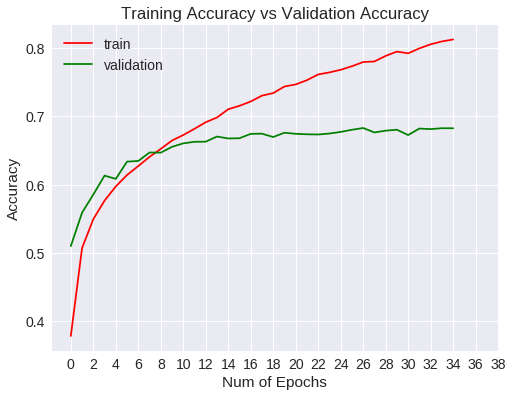

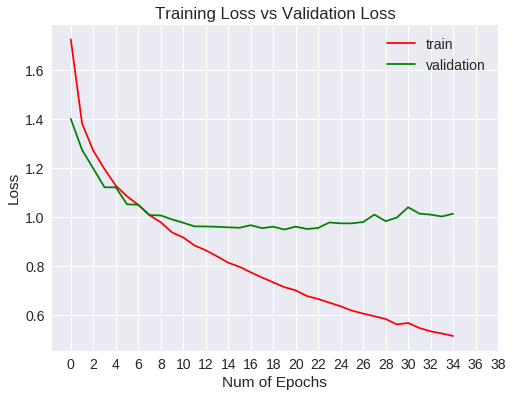

In [73]:

# Plots for training and testing process: loss and accuracy
 
plt.figure(0)
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'g')
plt.xticks(np.arange(0, 40, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
 
plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0, 40, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
 
plt.show()